# Konwolucyjne sieci neuronowe

Dziś spróbujemy stworzyć i wytrenować prostą sieć konwolucyjną do rozpoznawania, co znajduje się na obrazie. Następnie omówimy kwestię identyfikowania obiektów na obrazie, oraz porozmawiamy o wykorzystaniu gotowej już sieci.

## Problem klasyfikacji obrazów

Jak się za to zabrać? Naiwnym podejściem byłaby próba ręcznej specyfikacji pewnych cech (niemowlęta mają duże głowy, szczoteczki są długie, etc.). Szybko jednak stwierdziliśmy, że nawet dla niewielkiego zbioru kategorii jest to tytaniczna praca bez gwarancji sukcesu. Co więcej, istnieje wiele czynników zniekształcających zawartość naszych zdjęć. Obiekty mogą być przedstawiane z różnych ujęć, w różnych warunkach oświetleniowych, w różnej skali, częściowo niewidoczne, ukryte w tle...

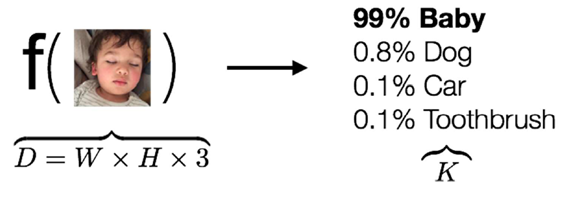


Wszystkie wymienione problemy są skutkiem istnienia semantycznej przepaści między tym, jak reprezentowane są nasze dane wejściowe (tablica liczb), a tym, czego w nich szukamy, czyli kategorii i cech: zwierząt, nosów, głów, itp. Zamiast więc próbować samodzielnie napisać funkcję $f(x)$, spróbujemy skorzystać z dobrodziejstw uczenia maszynowego, aby automatycznie skonstruować reprezentację wejścia właściwą dla postawionego sobie zadania (a przynajmniej lepszą od pierwotnej). I tu z pomocą przychodzą nam konwolucyjne sieci neuronowe. Do tego trzeba zrozumieć, czym jest konwolucja (inaczej: splot), a do tego najlepiej nadają się ilustracje, jak to działa.

### Konwolucja

Konwolucja (splot) to działanie określone dla dwóch funkcji, dające w wyniku inną, która może być postrzegana jako zmodyfikowana wersja oryginalnych funkcji.

Z naszego punktu widzenia polega to na tym, że mnożymy odpowiadające sobie elementy z dwóch macierzy: obrazu, oraz mniejszej, nazywanej filtrem (lub kernelem. Następnie sumujemy wynik i zapisujemy do macierzy wynikowej na odpowiedniej pozycji. Proces powtarza się aż do momentu przeskanowania całego obrazu. Taki filtr wykrywa, czy coś do niego pasuje w danym miejscu, i z tego wynika zdolność semantycznej generalizacji sieci - uczymy się cech, a wykrywamy je potem w dowolnym miejscu. [Przydatne pojęcia](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

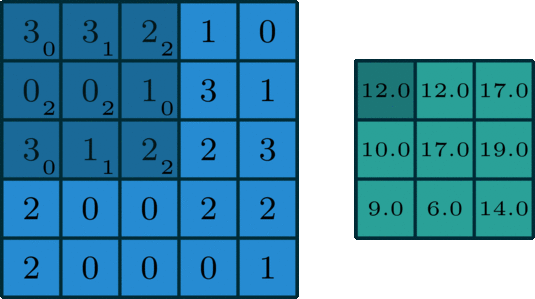

### Stride

Stride to inaczej *krok algorytmu*, albo *przesunięcie*. Określa co ile komórek macierzy następuje aplikacja operatora konwolucji. Jeśli stride wynosi 1 a operator konwolucji ma rozmiar np. 3 x 3, to każdy piksel (z wyjątkiem skrajnych narożnych pikseli) będzie uczestniczył w wielu operacjach konwolucji. Jeśli natomiast krok wyniósłby 3, to każdy piksel uczestniczyłby tylko jednokrotnie w tych operacjach. Należy pamiętać, że krok stosujemy zarówno w poziomie, jak i pionie. Najczęściej w obu kierunkach wykorzystuje się ten sam krok.


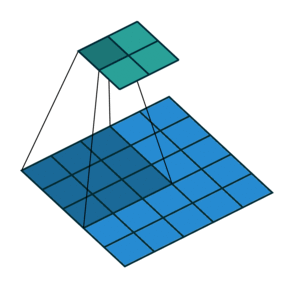



### Padding

Padding to inaczej *wypełnienie* krawędzi obrazu. Określa, w jaki sposób będą traktowane skrajne piksele. Jeśli padding wynosi 0, to skrajne piksele będą uczestniczyły w operacjach konwolucji rzadziej, niż pozostałe piksele (oczywiście jest to również uzależnione od wartości kroku). Aby zniwelować ten efekt, możemy dodać wypełnienie wokół całego obrazu. Te dodatkowe piksele mogą być zerami, albo mogą być również jakimiś uśrednionymi wartościami pikseli sąsiednich. Wypełnienie zerami oznacza de facto obramowanie całego obrazu czarną ramkną. 

[Więcej na temat wypełnienia.](https://www.geeksforgeeks.org/cnn-introduction-to-padding/)

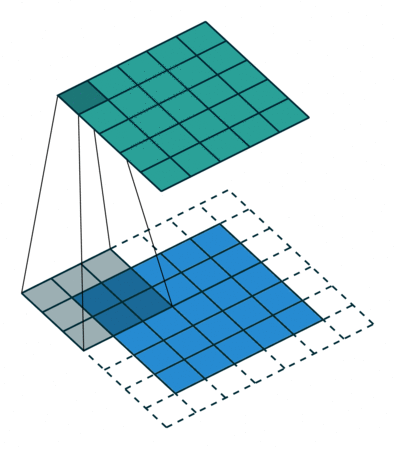

### Pooling

Pooling jest procesem wykorzystywanym do redukcji rozmiaru obrazu. 
Występują 2 warianty: *max-pooling* oraz *avg-pooling*. Pozwala on usunąć zbędne dane, np. jeżeli filtr wykrywa linie, to istnieje spora szansa, że linie te ciągną się przez sąsiednie piksele, więc nie ma powodu powielać tej informacji. Dzięki temu wprowadzamy pewną inwariancję w wagach sieci i jesteśmy odporni na niewielkie wahania lokalizacji informacji, a skupiamy się na "większym obrazie".

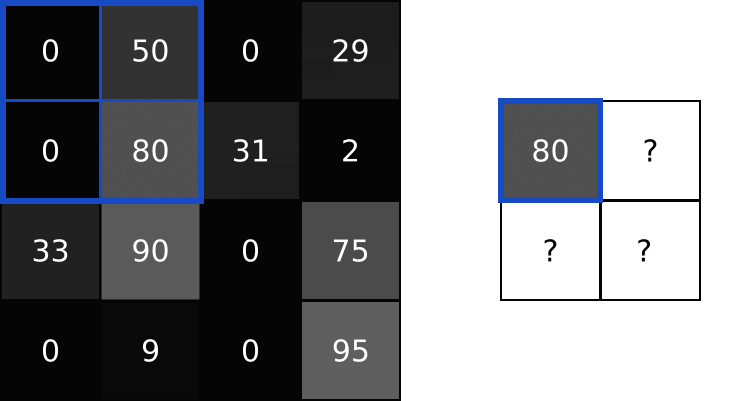

### Sposoby redukcji przeuczenia

* warstwa dropout - wyłączanie losowych neuronów w trakcie uczenia,
* regularyzacja wag - ograniczenie sumy wartości wag,
* metoda wczesnego stopu (early stopping) - zatrzymanie uczenia, jeśli proces uczenia nie poprawia wyników,
* normalizacja paczki (batch normalization) - centrowanie i skalowanie wartości wektorów *w obrębie batcha danych*, 
* rozszerzanie danych (data augmentation) - generowanie lekko zaburzonych danych, na podstawie danych treningowych,
* lub... więcej danych.

### Budowa sieci CNN do klasyfikacji obrazów

Sieć konwolucyjna składa się zawsze najpierw, zgodnie z nazwą, z części konwolucyjnej, której zadaniem jest wyodrębnienie przydatnych cech z obrazu za pomocą filtrów, warstw poolingowych etc.

Warstwa konwolucyjna sieci neuronowej składa się z wielu filtrów konwolucyjnych działających równolegle (tj. wykrywających różne cechy). Wagi kerneli, początkowo zainicjalizowane losowo, są dostrajane w procesie uczenia. Wynik działania poszczególnych filtrów jest przepuszczany przez funkcję nieliniową. Mamy tu do czynienia z sytuacją analogiczną jak w MLP: najpierw wykonujemy przekształcenie liniowe, a potem stosujemy funkcję aktywacji. Funkcji aktywacji nie stosuje się jendak po warstawch poolingowych, są to stałe operacje nie podlegające uczeniu.

W celu klasyfikacji obrazu musimy później użyć sieci MLP. Jako że wejściem do sieci MLP jest zawsze wektor, a wyjściem warstwy konwolucyjnej obraz. Musimy zatem obraz przetworzony przez filtry konwolucyjne sprowadzić do formy wektora, tzw. **embedding-u / osadzenia**, czyli reprezentacji obrazu jako punktu w pewnej ciągłej przestrzeni. Służy do tego warstwa spłaszczająca (flatten layer), rozwijająca macierze wielkowymiarowe na wektor, np $10 \times 10 \times 3$ na $300 \times 1$.

Część konwolucyjna nazywa się często **backbone**, a część MLP do klasyfikacji **head**. Głowa ma zwykle 1-2 warstwy w pełni połączone, z aktywacją softmax w ostatniej warstwie. Czasem jest nawet po prostu pojedynczą warstwą z softmaxem, bo w dużych sieciach konwolucyjnych ekstrakcja cech jest tak dobra, że taka prosta konstrukcja wystacza do klasyfikacji embeddingu.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

Wybierzmy rodzaj akceleracji. Współczesne wersje PyTorch wspierają akcelerację nie tylko na kartach Nvidii i AMD, ale również na procesorach Apple z serii M. Obsługa AMD jest realizowana identycznie jak CUDA natomiast MPS (Apple) ma nieco inne API do sprawdzania dostępności i wybierania urządzenia. 
Zapisujemy wybrane urządzenie do zmiennej `device`, dzięki czemu w dalszych częściach kodu już nie będziemy musieli o tym myśleć.

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

print(device)

cuda:0


W pakiecie torchvision mamy funkcje automatycznie pobierające niektóre najbardziej popularne zbiory danych z obrazami. 

W tym ćwiczeniu wykorzystamy zbiór FashionMNIST, który zawiera małe (28x28) zdjęcia ubrań w skali szarości. Zbiór ten został stworzony przez Zalando i jest "modowym" odpowiednikiem "cyferkowego" MNIST-a, jest z nim kompatybilny pod względem rozmiarów i charakterystyki danych, ale jest od MNIST-a trudniejszy w klasyfikacji.

Do funkcji ładujących zbiory danych możemy przekazać przekształcenie, które powinno zostać na nim wykonane. Przekształcenia można łączyć przy użyciu `transforms.Compose`. W tym przypadku przekonwertujemy dane z domyślnej reprezentacji PIL.Image na torch-owe tensory.

Pobrany dataset przekazujemy pod kontrolę DataLoader-a, który zajmuje się podawaniem danych w batch-ach podczas treningu.

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

batch_size = 32

trainset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True
)

testset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=True
)

classes = (
    "top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
)

print(type(testset[0][0]))

<class 'torch.Tensor'>


Zobaczmy, co jest w naszym zbiorze danych. Poniżej kawałek kodu, który wyświetli nam kilka przykładowych obrazków. Wartości pikseli są znormalizowane do przedziału [0,1].

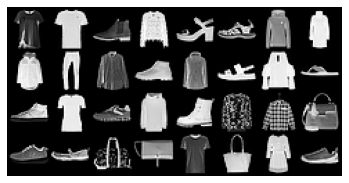

top        top        Ankle boot Shirt      Sandal     Sandal     Pullover   Coat      
Coat       Trouser    Shirt      Ankle boot Coat       Sandal     Shirt      Sandal    
Sneaker    top        Sneaker    Pullover   Ankle boot Pullover   Shirt      Bag       
Sneaker    Sandal     Bag        Bag        top        Bag        Dress      Sneaker   


In [4]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

def grid_show(images, nrow=8):
    imshow(torchvision.utils.make_grid(images, nrow=nrow))


def print_grid(labels, nrow=8):
    rows = [labels[n : n + nrow] for n in range(0, len(labels), nrow)]
    for r in rows:
        print(" ".join(f"{classes[c]:10s}" for c in r))

grid_show(images)
print_grid(labels)

## LeNet

LeNet to bardzo znany, klasyczny model sieci konwolucyjnej.

Warstwy:
- obraz
- konwolucja, kernel $5 \times 5$, bez paddingu, 6 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- konwolucja, kernel $5 \times 5$, bez paddingu, 16 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- warstwa w pełni połączona, 120 neuronów na wyjściu
- warstwa w pełni połączona, 84 neurony na wyjściu
- warstwa w pełni połączona, na wyjściu tyle neuronów, ile jest klas

**Zadanie 1 (2 punkty)**

Zaimplementuj wyżej opisaną sieć, używając biblioteki PyTorch. Wprowadzimy sobie jednak pewne modyfikacje, żeby było ciekawiej:
- w pierwszej warstwie konwolucyjnej użyj 20 kanałów (feature maps)
- w drugiej warstwie konwolucyjnej użyj 50 kanałów (feature maps)
- w pierwszej warstwie gęstej użyj 300 neuronów
- w drugiej warstwie gęstej użyj 100 neuronów

Przydatne elementy z pakietu `torch.nn`:
* `Conv2d()`
* `AvgPool2d()`
* `Linear()`

Z pakietu `torch.nn.functional`:
* `relu()`

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 20, (5, 5)),
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),
            nn.Conv2d(20, 50, (5, 5)),
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),
            nn.Flatten(),
            nn.Linear(800, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        return self.model(x)
    

Do treningu użyjemy stochastycznego spadku po gradiencie (SGD), a jako funkcję straty Categorical Cross Entropy. W PyTorch-u funkcja ta operuje na indeksach klas (int), a nie na wektorach typu one-hot (jak w Tensorflow).

In [6]:
import torch.optim as optim

net = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
# nie było w poleceniu, ale zmieniłem hiperparametry, bo z lr=0.001 wyniki były tragiczne
# pewnie dałoby się jeszcze lepiej, ale nie wiem czy w ogóle powinienem z tym kombinować,
# więc zmieniłem tylko na tyle, żeby sieć się faktycznie czegokolwiek uczyła

**Zadanie 2 (1 punkt)**

Uzupełnij pętlę uczącą sieć na podstawie jej predykcji. Oblicz (wykonaj krok do przodu) funkcję straty, a następnie przeprowadź propagację wsteczną i wykonaj krok optymalizatora.

In [7]:
net.train()

for epoch in range(5):
    for images, labels in dataiter:
        images, labels = images.to(device), labels.to(device)
        labels_pred = net(images).to(device)    
        loss = criterion(labels_pred, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


Zobaczmy na kilku przykładach jak działa wytrenowana sieć.

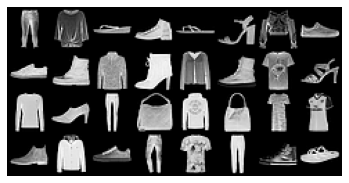

Ground Truth
Trouser    Pullover   Sandal     Ankle boot Sandal     Sandal     Shirt      Sneaker   
Sneaker    Ankle boot Pullover   Ankle boot Shirt      Ankle boot top        Sandal    
Pullover   Ankle boot Trouser    Bag        Pullover   Bag        Dress      top       
Ankle boot Coat       Sneaker    Trouser    top        Trouser    Sneaker    Sandal    

Predicted
Trouser    Pullover   Sandal     Ankle boot Sandal     Sandal     Pullover   Sandal    
Sneaker    Ankle boot Shirt      Ankle boot Pullover   Ankle boot top        Sandal    
Pullover   Sandal     Trouser    Bag        Pullover   Bag        Dress      top       
Ankle boot Shirt      Sneaker    Trouser    top        Trouser    Ankle boot Sandal    


In [8]:
dataiter = iter(testloader)
images, labels = next(dataiter)

grid_show(images)
print("Ground Truth")
print_grid(labels)

outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print()
print("Predicted")
print_grid(predicted)

Obliczmy dokładności (accuracy) dla zbioru danych.

In [9]:
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 82 %


Skomentuj wyniki:

*   Bez zmiany learning rate wyniki były beznadziejne, accuracy ok 8%
*   Po zmianie LR model ma accuracy ~70% (czasem trochę wyższe lub niższe, zależnie od danych, które zwrócił testloader), co jest wynikiem dobrym, ale prawdopodobnie da się go znacznie poprawić

Znając ogólny wynik klasyfikacji dla zbioru przeanalizujmy dokładniej, z którymi klasami jest największy problem.

**Zadanie 3 (1 punkt)**

Oblicz dokładność działania sieci (accuracy) dla każdej klasy z osobna. Podczas oceniania skuteczności modelu nie potrzebujemy, aby gradienty się liczyły. Możemy zatem zawrzeć obliczenia w bloku `with torch.no_grad():`

In [10]:
net.eval()

class_scores = [[0, 0] for _ in range(10)]

with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        for i, label in enumerate(labels.to(device)):
            pred = predicted[i]
            class_scores[label][1] += 1
            if pred == label:
                class_scores[label][0] += 1

for i, score in enumerate(class_scores):
    print(f'{classes[i]} accuracy: {score[0] * 100 / score[1]}%')

top accuracy: 85.1%
Trouser accuracy: 94.0%
Pullover accuracy: 74.6%
Dress accuracy: 90.1%
Coat accuracy: 59.4%
Sandal accuracy: 94.8%
Shirt accuracy: 40.5%
Sneaker accuracy: 91.7%
Bag accuracy: 96.5%
Ankle boot accuracy: 94.4%


Skomentuj wyniki:

*   Wyniki są bardzo słabe dla klas Shirt i Coat. Reszta klas jest rozpoznawana w większości poprawnie, niektóre mają accuracy nawet powyżej 90%

## Detekcja obiektów

Problem detekcji polega na nie tylko sklasyfikowaniu obiektów na obrazie, ale również wyznaczeniu jego dokładnego położenia w postaci bounding-box-u.
Choć jest to problem odmienny od klasyfikacji obrazów, to w praktyce ściśle z nim powiązany - modele do detekcji obiektów przeważnie do pewnego momentu wyglądają tak samo, jak modele klasyfikacji. Jednak pod koniec sieć jest dzielona na 2 wyjścia: jedno to standardowa klasyfikacja, a drugie to regresor określający pozycję obiektu na obrazie, tzw. bounding box. Najpopularniejszymi przykładami takich sieci są YOLO i Mask R-CNN. Zbiór danych też jest odpowiednio przygotowany do tego zadania i oprócz właściwych zdjęć zawiera również listę bounding-box-ów i ich etykiety.

Zobaczymy jak działa detekcja na przykładzie już wytrenowanej sieci neuronowej. Autorzy skutecznych sieci często udostępniają ich wagi online, dzięki czemu jeżeli mamy doczynienia z analogicznym problemem jak ten, do którego dana sieć była przygotowana możemy z niej skorzystać "prosto z pudełka". 

PyTorch pozwala nam na pobranie wytrenowanych wag dla kilku najpopularniejszych modeli. Sprawdzimy jak z tego skorzystać.

In [3]:
from torchvision.models import detection
import numpy as np
import cv2
from PIL import Image
import urllib

Poniżej znajduje się funkcja pozwalająca wczytać obraz z sieci. Przyda się do testowania działania sieci.

In [4]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

Model, którym się zajmiemy to Faster R-CNN, który był trenowany na zbiorze COCO. Poniżej znajduje się lista klas (etykiet) dla tego zbioru danych.

In [5]:
classes = [
    "__background__",
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "street sign",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "hat",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "shoe",
    "eye glasses",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "plate",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "mirror",
    "dining table",
    "window",
    "desk",
    "toilet",
    "door",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "blender",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

colors = np.random.randint(0, 256, size=(len(classes), 3))

Inizjalizacja modelu ResNet50-FPN wytrenowanymi wagami. Inicjalizujemy zarówno sieć backbone jak i RCNN.

In [6]:
model = detection.fasterrcnn_resnet50_fpn(
    weights=detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT,
    weights_backbone=torchvision.models.ResNet50_Weights.DEFAULT,
    progress=True,
    num_classes=len(classes)
).to(device)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

IPython, z którego korzystamy w Jupyter Notebooku, ma wbudowaną funkcję `display()` do wyświetlania obrazów. 

Do pobierania obrazów możemy się posłyżyć wget-em.

In [8]:
# Pobieranie obrazka z sieci
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg --output-document toothbrushes.jpg

--2023-12-21 16:33:49--  https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338300 (330K) [image/jpeg]
Saving to: ‘toothbrushes.jpg’

toothbrushes.jpg    100%[===================>] 330,37K  --.-KB/s    in 0,1s    

2023-12-21 16:33:49 (2,70 MB/s) - ‘toothbrushes.jpg’ saved [338300/338300]



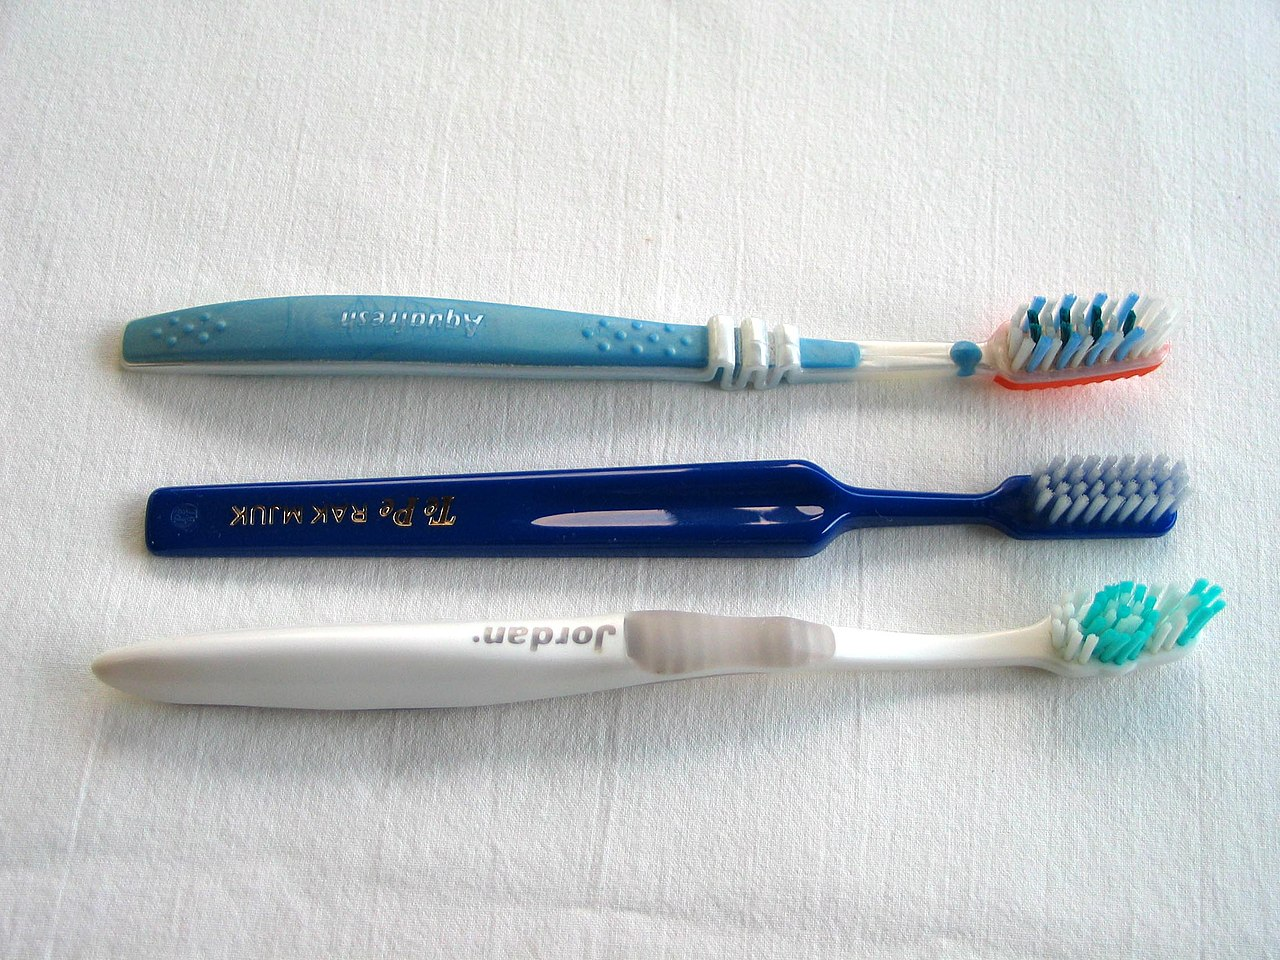

In [7]:
# Wyświetlanie obrazka
image = Image.open("toothbrushes.jpg")
# make sure we have 3-channel RGB, e.g. without transparency
image = image.convert("RGB")
display(image)

PyTorch wymaga obrazów w kształcie [channels, height, width] (C, H, W) oraz z wartościami pikseli między 0 a 1. Pillow wczytuje obrazy z kanałami (H, W, C) oraz z wartościami pikseli między 0 a 255. Przed wykorzystaniem sieci neuronowej trzeba zatem:
- zamienić obraz na tensor
- zmienić kolejność kanałów
- podzielić wartości pikseli przez 255

In [18]:
image_tensor = torch.from_numpy(np.array(image))
image_tensor = image_tensor.permute(2, 0, 1)
image_tensor_int = image_tensor  # useful for displaying, dtype = uint8
image_tensor = image_tensor / 255
image_tensor.shape, image_tensor.dtype

(torch.Size([3, 960, 1280]), torch.float32)

**Zadanie 4 (1 punkt)**

Użyj modelu do wykrycia obiektów na obrazie. Następnie wybierz tylko te bounding boxy, dla których mamy wynik powyżej 50%. Wypisz te bounding boxy, ich prawdopodobieństwa (w procentach) oraz nazwy klas.

Następnie wykorzystaj wyniki do zaznaczenia bounding box'a dla każdego wykrytego obiektu na obrazie oraz podpisz wykrytą klasę wraz z prawdopodobieństwem. Możesz tutaj użyć:
- [OpenCV](https://stackoverflow.com/questions/56108183/python-opencv-cv2-drawing-rectangle-with-text)
- [PyTorch - Torchvision](https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#visualizing-bounding-boxes)

Box: [ 269.0258   585.4757  1246.7504   715.89514], score: 0.941705584526062, class: toothbrush
Box: [  90.03049  266.97842 1196.9512   404.1362 ], score: 0.8841335773468018, class: toothbrush
Box: [ 601.2891   456.07553 1180.7574   556.1579 ], score: 0.6982854604721069, class: spoon
Box: [ 617.23346  586.1252  1193.0754   689.2256 ], score: 0.6300309896469116, class: toothbrush


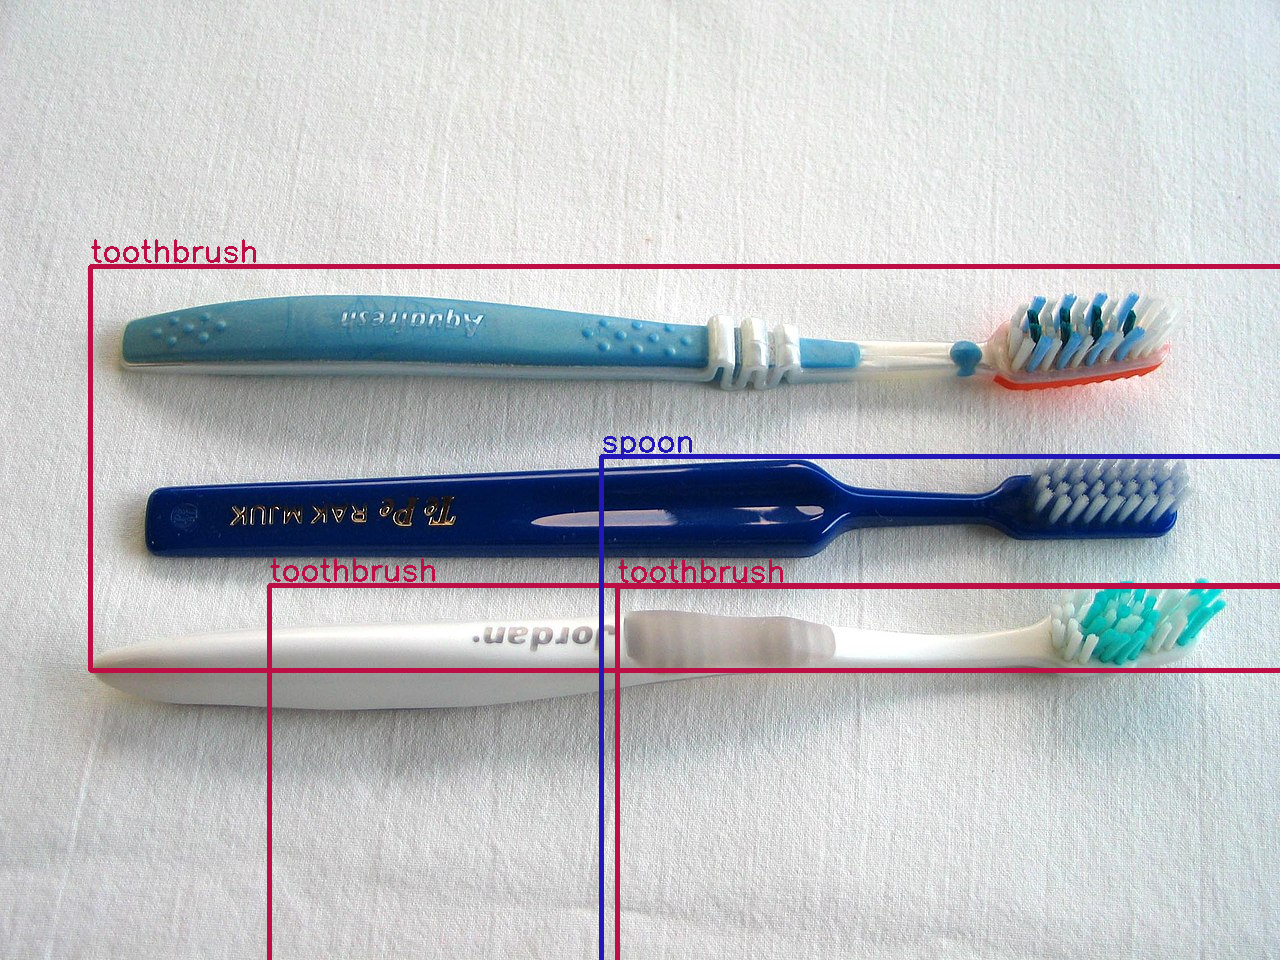

In [19]:
# your_code
with torch.no_grad():
    outputs = model(image_tensor.unsqueeze(0).to(device))[0]
    
scores = outputs['scores'].detach().cpu().numpy()
boxes = outputs['boxes'].cpu().numpy()
labels = outputs['labels'].cpu().numpy()
pred_classes = [classes[label] for label in labels]

image_numpy = np.ascontiguousarray(image_tensor_int.permute(1, 2, 0))

for i, box in enumerate(boxes):
    if scores[i] > 0.5:
        print(f'Box: {box}, score: {scores[i]}, class: {pred_classes[i]}') 
        color = colors[labels[i]]
        color = (int(color[0]), int(color[1]), int(color[2])) 
        x, y, w, h = box.astype(np.int64)
        pt1 = (x, y)
        pt2 = (x + w, y + h)
        image_numpy = cv2.rectangle(image_numpy, pt1, pt2, color, 3)
        image_numpy = cv2.putText(image_numpy, pred_classes[i], (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=color, thickness=2)

display(Image.fromarray(image_numpy.astype(np.uint8)))

## Fine-tuning i pretrening

Trenowanie głębokich sieci neuronowych do przetwarzania obrazów jest zadaniem wymagającym bardzo dużych zbiorów danych i zasobów obliczeniowych. Często jednak, nie musimy trenować takich sieci od nowa, możemy wykorzystać wytrenowane modele i jedynie dostosowywaać je do naszych problemów. Działanie takie nazywa się transfer learning-iem. 

Przykładowao: mamy już wytrenowaną sieć na dużym zbiorze danych (pretrening) i chcemy, żeby sieć poradziła sobie z nową klasą obiektów (klasyfikacja), albo lepiej radziła sobie z wybranymi obiektami, które już zna (fine-tuning). Możemy usunąć ostatnią warstwę sieci i na jej miejsce wstawić nową, identyczną, jednak z losowo zainicjalizowanymi wagami, a następnie dotrenować sieć na naszym nowym, bardziej specyficznym zbiorze danych. Przykładowo, jako bazę weźmiemy model wytrenowany na zbiorze ImageNet i będziemy chcieli użyć go do rozpoznawania nowych, nieznanych mu klas, np. ras psów.

Dla przećwiczenia takiego schematu działania wykorzystamy zbiór danych z hotdogami. Będziemy chcieli stwierdzić, czy na obrazku jest hotdog, czy nie. Jako sieci użyjemy modelu ResNet-18, pretrenowanej na zbiorze ImageNet.

In [20]:
# Download the hotdog dataset
!wget http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
!unzip -n hotdog.zip

--2023-12-23 14:20:32--  http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
Resolving d2l-data.s3-accelerate.amazonaws.com (d2l-data.s3-accelerate.amazonaws.com)... 18.245.74.123
Connecting to d2l-data.s3-accelerate.amazonaws.com (d2l-data.s3-accelerate.amazonaws.com)|18.245.74.123|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261292301 (249M) [application/zip]
Saving to: ‘hotdog.zip’

hotdog.zip          100%[===================>] 249,19M  14,1MB/s    in 23s     

2023-12-23 14:20:56 (10,8 MB/s) - ‘hotdog.zip’ saved [261292301/261292301]

Archive:  hotdog.zip
   creating: hotdog/
   creating: hotdog/train/
   creating: hotdog/train/not-hotdog/
 extracting: hotdog/train/not-hotdog/50.png  
 extracting: hotdog/train/not-hotdog/554.png  
 extracting: hotdog/train/not-hotdog/299.png  
  inflating: hotdog/train/not-hotdog/428.png  
  inflating: hotdog/train/not-hotdog/475.png  
  inflating: hotdog/train/not-hotdog/933.png  
 extracting: hotdog/train/not-hotdo

  inflating: hotdog/train/not-hotdog/470.png  
 extracting: hotdog/train/not-hotdog/919.png  
  inflating: hotdog/train/not-hotdog/986.png  
 extracting: hotdog/train/not-hotdog/532.png  
 extracting: hotdog/train/not-hotdog/580.png  
  inflating: hotdog/train/not-hotdog/939.png  
 extracting: hotdog/train/not-hotdog/951.png  
  inflating: hotdog/train/not-hotdog/513.png  
  inflating: hotdog/train/not-hotdog/991.png  
  inflating: hotdog/train/not-hotdog/672.png  
  inflating: hotdog/train/not-hotdog/982.png  
  inflating: hotdog/train/not-hotdog/376.png  
 extracting: hotdog/train/not-hotdog/291.png  
  inflating: hotdog/train/not-hotdog/722.png  
 extracting: hotdog/train/not-hotdog/530.png  
 extracting: hotdog/train/not-hotdog/9.png  
  inflating: hotdog/train/not-hotdog/483.png  
  inflating: hotdog/train/not-hotdog/168.png  
  inflating: hotdog/train/not-hotdog/209.png  
  inflating: hotdog/train/not-hotdog/146.png  
  inflating: hotdog/train/not-hotdog/401.png  
  inflating: ho

  inflating: hotdog/train/not-hotdog/309.png  
  inflating: hotdog/train/not-hotdog/443.png  
 extracting: hotdog/train/not-hotdog/968.png  
  inflating: hotdog/train/not-hotdog/622.png  
  inflating: hotdog/train/not-hotdog/353.png  
  inflating: hotdog/train/not-hotdog/317.png  
  inflating: hotdog/train/not-hotdog/878.png  
  inflating: hotdog/train/not-hotdog/515.png  
 extracting: hotdog/train/not-hotdog/104.png  
  inflating: hotdog/train/not-hotdog/391.png  
  inflating: hotdog/train/not-hotdog/444.png  
  inflating: hotdog/train/not-hotdog/666.png  
 extracting: hotdog/train/not-hotdog/253.png  
 extracting: hotdog/train/not-hotdog/41.png  
 extracting: hotdog/train/not-hotdog/306.png  
 extracting: hotdog/train/not-hotdog/58.png  
  inflating: hotdog/train/not-hotdog/93.png  
  inflating: hotdog/train/not-hotdog/551.png  
  inflating: hotdog/train/not-hotdog/643.png  
  inflating: hotdog/train/not-hotdog/240.png  
 extracting: hotdog/train/not-hotdog/874.png  
  inflating: hot

  inflating: hotdog/train/not-hotdog/802.png  
  inflating: hotdog/train/not-hotdog/89.png  
  inflating: hotdog/train/not-hotdog/366.png  
 extracting: hotdog/train/not-hotdog/727.png  
 extracting: hotdog/train/not-hotdog/91.png  
 extracting: hotdog/train/not-hotdog/791.png  
 extracting: hotdog/train/not-hotdog/960.png  
  inflating: hotdog/train/not-hotdog/809.png  
  inflating: hotdog/train/not-hotdog/646.png  
  inflating: hotdog/train/not-hotdog/988.png  
  inflating: hotdog/train/not-hotdog/36.png  
  inflating: hotdog/train/not-hotdog/620.png  
  inflating: hotdog/train/not-hotdog/347.png  
  inflating: hotdog/train/not-hotdog/755.png  
  inflating: hotdog/train/not-hotdog/377.png  
  inflating: hotdog/train/not-hotdog/43.png  
 extracting: hotdog/train/not-hotdog/529.png  
 extracting: hotdog/train/not-hotdog/261.png  
  inflating: hotdog/train/not-hotdog/819.png  
  inflating: hotdog/train/not-hotdog/887.png  
  inflating: hotdog/train/not-hotdog/258.png  
  inflating: hotd

  inflating: hotdog/train/not-hotdog/160.png  
  inflating: hotdog/train/not-hotdog/286.png  
  inflating: hotdog/train/not-hotdog/584.png  
 extracting: hotdog/train/not-hotdog/731.png  
  inflating: hotdog/train/not-hotdog/37.png  
  inflating: hotdog/train/not-hotdog/51.png  
  inflating: hotdog/train/not-hotdog/536.png  
  inflating: hotdog/train/not-hotdog/710.png  
  inflating: hotdog/train/not-hotdog/218.png  
 extracting: hotdog/train/not-hotdog/108.png  
 extracting: hotdog/train/not-hotdog/938.png  
  inflating: hotdog/train/not-hotdog/151.png  
  inflating: hotdog/train/not-hotdog/426.png  
 extracting: hotdog/train/not-hotdog/976.png  
 extracting: hotdog/train/not-hotdog/844.png  
 extracting: hotdog/train/not-hotdog/476.png  
  inflating: hotdog/train/not-hotdog/99.png  
  inflating: hotdog/train/not-hotdog/855.png  
  inflating: hotdog/train/not-hotdog/369.png  
  inflating: hotdog/train/not-hotdog/647.png  
  inflating: hotdog/train/not-hotdog/354.png  
  inflating: hot

  inflating: hotdog/train/hotdog/196.png  
 extracting: hotdog/train/hotdog/534.png  
 extracting: hotdog/train/hotdog/642.png  
  inflating: hotdog/train/hotdog/152.png  
  inflating: hotdog/train/hotdog/434.png  
 extracting: hotdog/train/hotdog/953.png  
  inflating: hotdog/train/hotdog/308.png  
 extracting: hotdog/train/hotdog/682.png  
  inflating: hotdog/train/hotdog/595.png  
  inflating: hotdog/train/hotdog/662.png  
  inflating: hotdog/train/hotdog/619.png  
  inflating: hotdog/train/hotdog/719.png  
 extracting: hotdog/train/hotdog/437.png  
  inflating: hotdog/train/hotdog/752.png  
  inflating: hotdog/train/hotdog/671.png  
  inflating: hotdog/train/hotdog/469.png  
  inflating: hotdog/train/hotdog/83.png  
  inflating: hotdog/train/hotdog/462.png  
  inflating: hotdog/train/hotdog/452.png  
  inflating: hotdog/train/hotdog/455.png  
  inflating: hotdog/train/hotdog/115.png  
 extracting: hotdog/train/hotdog/163.png  
  inflating: hotdog/train/hotdog/395.png  
  inflating:

  inflating: hotdog/train/hotdog/565.png  
 extracting: hotdog/train/hotdog/416.png  
  inflating: hotdog/train/hotdog/216.png  
  inflating: hotdog/train/hotdog/424.png  
  inflating: hotdog/train/hotdog/382.png  
  inflating: hotdog/train/hotdog/655.png  
  inflating: hotdog/train/hotdog/222.png  
 extracting: hotdog/train/hotdog/154.png  
  inflating: hotdog/train/hotdog/249.png  
  inflating: hotdog/train/hotdog/998.png  
  inflating: hotdog/train/hotdog/194.png  
  inflating: hotdog/train/hotdog/419.png  
 extracting: hotdog/train/hotdog/852.png  
  inflating: hotdog/train/hotdog/188.png  
  inflating: hotdog/train/hotdog/372.png  
  inflating: hotdog/train/hotdog/19.png  
  inflating: hotdog/train/hotdog/259.png  
 extracting: hotdog/train/hotdog/632.png  
  inflating: hotdog/train/hotdog/182.png  
  inflating: hotdog/train/hotdog/200.png  
  inflating: hotdog/train/hotdog/474.png  
  inflating: hotdog/train/hotdog/593.png  
 extracting: hotdog/train/hotdog/198.png  
  inflating:

  inflating: hotdog/train/hotdog/702.png  
  inflating: hotdog/train/hotdog/557.png  
 extracting: hotdog/train/hotdog/320.png  
  inflating: hotdog/train/hotdog/454.png  
 extracting: hotdog/train/hotdog/613.png  
  inflating: hotdog/train/hotdog/319.png  
 extracting: hotdog/train/hotdog/471.png  
 extracting: hotdog/train/hotdog/579.png  
  inflating: hotdog/train/hotdog/484.png  
  inflating: hotdog/train/hotdog/480.png  
 extracting: hotdog/train/hotdog/410.png  
  inflating: hotdog/train/hotdog/528.png  
  inflating: hotdog/train/hotdog/227.png  
  inflating: hotdog/train/hotdog/123.png  
  inflating: hotdog/train/hotdog/121.png  
 extracting: hotdog/train/hotdog/170.png  
  inflating: hotdog/train/hotdog/937.png  
 extracting: hotdog/train/hotdog/764.png  
  inflating: hotdog/train/hotdog/363.png  
  inflating: hotdog/train/hotdog/668.png  
  inflating: hotdog/train/hotdog/107.png  
  inflating: hotdog/train/hotdog/599.png  
  inflating: hotdog/train/hotdog/866.png  
  inflating

  inflating: hotdog/train/hotdog/210.png  
  inflating: hotdog/train/hotdog/621.png  
  inflating: hotdog/train/hotdog/980.png  
  inflating: hotdog/train/hotdog/464.png  
  inflating: hotdog/train/hotdog/31.png  
  inflating: hotdog/train/hotdog/148.png  
  inflating: hotdog/train/hotdog/289.png  
  inflating: hotdog/train/hotdog/652.png  
  inflating: hotdog/train/hotdog/64.png  
  inflating: hotdog/train/hotdog/846.png  
 extracting: hotdog/train/hotdog/785.png  
 extracting: hotdog/train/hotdog/280.png  
  inflating: hotdog/train/hotdog/357.png  
 extracting: hotdog/train/hotdog/270.png  
 extracting: hotdog/train/hotdog/24.png  
  inflating: hotdog/train/hotdog/572.png  
 extracting: hotdog/train/hotdog/569.png  
  inflating: hotdog/train/hotdog/886.png  
  inflating: hotdog/train/hotdog/679.png  
  inflating: hotdog/train/hotdog/545.png  
 extracting: hotdog/train/hotdog/738.png  
  inflating: hotdog/train/hotdog/136.png  
  inflating: hotdog/train/hotdog/524.png  
  inflating: h

  inflating: hotdog/train/hotdog/160.png  
 extracting: hotdog/train/hotdog/286.png  
  inflating: hotdog/train/hotdog/584.png  
  inflating: hotdog/train/hotdog/731.png  
  inflating: hotdog/train/hotdog/37.png  
  inflating: hotdog/train/hotdog/51.png  
  inflating: hotdog/train/hotdog/536.png  
 extracting: hotdog/train/hotdog/710.png  
  inflating: hotdog/train/hotdog/218.png  
  inflating: hotdog/train/hotdog/108.png  
  inflating: hotdog/train/hotdog/938.png  
  inflating: hotdog/train/hotdog/151.png  
  inflating: hotdog/train/hotdog/426.png  
  inflating: hotdog/train/hotdog/976.png  
 extracting: hotdog/train/hotdog/844.png  
  inflating: hotdog/train/hotdog/476.png  
  inflating: hotdog/train/hotdog/99.png  
  inflating: hotdog/train/hotdog/855.png  
  inflating: hotdog/train/hotdog/369.png  
 extracting: hotdog/train/hotdog/647.png  
  inflating: hotdog/train/hotdog/354.png  
 extracting: hotdog/train/hotdog/916.png  
  inflating: hotdog/train/hotdog/564.png  
  inflating: h

  inflating: hotdog/test/not-hotdog/1017.png  
  inflating: hotdog/test/not-hotdog/1276.png  
 extracting: hotdog/test/not-hotdog/1011.png  
  inflating: hotdog/test/not-hotdog/1273.png  
  inflating: hotdog/test/not-hotdog/1317.png  
 extracting: hotdog/test/not-hotdog/1122.png  
  inflating: hotdog/test/not-hotdog/1346.png  
  inflating: hotdog/test/not-hotdog/1134.png  
  inflating: hotdog/test/not-hotdog/1115.png  
  inflating: hotdog/test/not-hotdog/1245.png  
 extracting: hotdog/test/not-hotdog/1270.png  
  inflating: hotdog/test/not-hotdog/1084.png  
  inflating: hotdog/test/not-hotdog/1390.png  
  inflating: hotdog/test/not-hotdog/1269.png  
  inflating: hotdog/test/not-hotdog/1330.png  
  inflating: hotdog/test/not-hotdog/1189.png  
  inflating: hotdog/test/not-hotdog/1022.png  
  inflating: hotdog/test/not-hotdog/1173.png  
 extracting: hotdog/test/not-hotdog/1288.png  
  inflating: hotdog/test/not-hotdog/1239.png  
 extracting: hotdog/test/not-hotdog/1256.png  
  inflating: 

 extracting: hotdog/test/hotdog/1067.png  
  inflating: hotdog/test/hotdog/1383.png  
  inflating: hotdog/test/hotdog/1377.png  
  inflating: hotdog/test/hotdog/1015.png  
  inflating: hotdog/test/hotdog/1172.png  
  inflating: hotdog/test/hotdog/1030.png  
  inflating: hotdog/test/hotdog/1114.png  
  inflating: hotdog/test/hotdog/1186.png  
  inflating: hotdog/test/hotdog/1200.png  
  inflating: hotdog/test/hotdog/1380.png  
 extracting: hotdog/test/hotdog/1247.png  
  inflating: hotdog/test/hotdog/1206.png  
  inflating: hotdog/test/hotdog/1246.png  
  inflating: hotdog/test/hotdog/1227.png  
  inflating: hotdog/test/hotdog/1079.png  
  inflating: hotdog/test/hotdog/1297.png  
  inflating: hotdog/test/hotdog/1378.png  
  inflating: hotdog/test/hotdog/1286.png  
  inflating: hotdog/test/hotdog/1045.png  
  inflating: hotdog/test/hotdog/1138.png  
  inflating: hotdog/test/hotdog/1299.png  
  inflating: hotdog/test/hotdog/1118.png  
  inflating: hotdog/test/hotdog/1047.png  
  inflating

  inflating: hotdog/test/hotdog/1051.png  
  inflating: hotdog/test/hotdog/1207.png  
 extracting: hotdog/test/hotdog/1234.png  
  inflating: hotdog/test/hotdog/1125.png  
 extracting: hotdog/test/hotdog/1370.png  
 extracting: hotdog/test/hotdog/1054.png  
  inflating: hotdog/test/hotdog/1228.png  
  inflating: hotdog/test/hotdog/1109.png  
  inflating: hotdog/test/hotdog/1013.png  
  inflating: hotdog/test/hotdog/1240.png  
 extracting: hotdog/test/hotdog/1176.png  
  inflating: hotdog/test/hotdog/1216.png  
  inflating: hotdog/test/hotdog/1106.png  
  inflating: hotdog/test/hotdog/1159.png  
  inflating: hotdog/test/hotdog/1185.png  
 extracting: hotdog/test/hotdog/1064.png  
  inflating: hotdog/test/hotdog/1190.png  
 extracting: hotdog/test/hotdog/1066.png  
 extracting: hotdog/test/hotdog/1156.png  
  inflating: hotdog/test/hotdog/1192.png  
  inflating: hotdog/test/hotdog/1301.png  
  inflating: hotdog/test/hotdog/1255.png  
  inflating: hotdog/test/hotdog/1026.png  
  inflating

Kiedy korzystamy z sieci pretrenowanej na zbiorze ImageNet, zgodnie [z dokumentacją](https://pytorch.org/vision/0.8/models.html) trzeba dokonać standaryzacji naszych obrazów, odejmując średnią i dzieląc przez odchylenie standardowe każdego kanału ze zbioru ImageNet.

```
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are
expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229,
0.224, 0.225]. You can use the following transform to normalize:

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

```

In [5]:
torch.manual_seed(17)

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

train_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

test_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

In [6]:
pretrained_net = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)

In [7]:
pretrained_net.fc

Linear(in_features=512, out_features=1000, bias=True)

**Zadanie 5 (1 punkt)**

Dodaj warstwę liniową do naszej fine-fune'owanej sieci oraz zainicjuj ją losowymi wartościami.

In [8]:
import torch.nn as nn


linear_layer = nn.Linear(1000, 1000)
nn.init.xavier_uniform_(linear_layer.weight)
finetuned_net = nn.Sequential(
    pretrained_net,
    linear_layer
)
finetuned_net

Sequential(
  (0): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [9]:
import time
import copy


def train_model(
    model, dataloaders, criterion, optimizer, num_epochs=25
):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(1, num_epochs + 1):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == "train"):
                    # Get model outputs and calculate loss
                    
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == "val":
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [10]:
import os

data_dir = "hotdog"
batch_size = 32

model_ft = finetuned_net.to(device)
train_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "train"), transform=train_augs
    ),
    batch_size=batch_size,
    shuffle=True,
)
test_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "test"), transform=test_augs
    ),
    shuffle=True,
    batch_size=batch_size,
)
loss = nn.CrossEntropyLoss(reduction="none")

**Zadanie 6 (1 punkt)**

Zmodyfikuj tak parametry sieci, aby learning rate dla ostatniej warstwy był 10 razy wyższy niż dla pozostałych.

Trzeba odpowiednio podać pierwszy parametr `torch.optim.SGD` tak, aby zawierał parametry normalne, oraz te z `lr * 10`. Paramety warstw niższych to takie, które mają nazwę inną niż `fc.weight` albo `fc.bias` - może się przydać metoda sieci `named_parameters()`.


In [15]:
def train_fine_tuning(net, learning_rate, num_epochs=15):

    trainer = torch.optim.SGD([
        {'params': net[0].parameters()},
        {'params': net[1].parameters(), 'lr': learning_rate * 10}
    ], lr=learning_rate) # your code here
    
    dataloaders_dict = {"train": train_iter, "val": test_iter}
    criterion = nn.CrossEntropyLoss()
    model_ft, hist = train_model(
        net, dataloaders_dict, criterion, trainer, num_epochs=num_epochs
    )
    return model_ft, hist


# your_code


In [16]:
model_ft, hist = train_fine_tuning(model_ft, learning_rate=5e-5)

Epoch 1/15
----------
train Loss: 5.0532 Acc: 0.2635
val Loss: 1.7255 Acc: 0.6600

Epoch 2/15
----------
train Loss: 1.3114 Acc: 0.7325
val Loss: 0.8524 Acc: 0.7950

Epoch 3/15
----------
train Loss: 0.8034 Acc: 0.8175
val Loss: 0.6105 Acc: 0.8425

Epoch 4/15
----------
train Loss: 0.5933 Acc: 0.8450
val Loss: 0.4673 Acc: 0.8687

Epoch 5/15
----------
train Loss: 0.5218 Acc: 0.8545
val Loss: 0.3879 Acc: 0.8800

Epoch 6/15
----------
train Loss: 0.4326 Acc: 0.8755
val Loss: 0.3472 Acc: 0.8812

Epoch 7/15
----------
train Loss: 0.4066 Acc: 0.8770
val Loss: 0.3156 Acc: 0.8963

Epoch 8/15
----------
train Loss: 0.3783 Acc: 0.8795
val Loss: 0.2870 Acc: 0.9013

Epoch 9/15
----------
train Loss: 0.3577 Acc: 0.8795
val Loss: 0.2661 Acc: 0.9000

Epoch 10/15
----------
train Loss: 0.3695 Acc: 0.8710
val Loss: 0.2450 Acc: 0.9075

Epoch 11/15
----------
train Loss: 0.3370 Acc: 0.8855
val Loss: 0.2403 Acc: 0.9075

Epoch 12/15
----------
train Loss: 0.3164 Acc: 0.8850
val Loss: 0.2219 Acc: 0.9150

E

skomentuj wyniki:

*   Model osiągnął bardzo dobre accuracy podczas stosunkowo krótkiego uczenia. Model bez pretreningu prawdopodobnie potrzebowałby więcej bardziej zaawansowanego treningu. Przydatna jest możliwość dodania dodatkowych warstw do gotowego modelu i uczenia ich z innym LR.

Przy wyświetlaniu predykcji sieci musimy wykonać operacje odwrotne niż te, które wykonaliśmy, przygotowując obrazy do treningu:
- zamienić kolejność kanałów z (C, H, W) na (H, W, C)
- zamienić obraz z tensora na tablicę Numpy'a
- odwrócić normalizację (mnożymy przez odchylenie standardowe, dodajemy średnią) i upewnić się, że nie wychodzimy poza zakres [0, 1] (wystarczy proste przycięcie wartości)

In [17]:
def imshow(img, title=None):
    img = img.permute(1, 2, 0).numpy()
    means = np.array([0.485, 0.456, 0.406])
    stds = np.array([0.229, 0.224, 0.225])
    img = stds * img + means
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    if title is not None:
        plt.title(title)
    
    plt.pause(0.001)

In [18]:
import matplotlib.pyplot as plt
plt.ion()  


def visualize_model(model, num_images=6):
    class_names = ["hotdog", "other"]
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_iter):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')

                imshow(inputs.data[j].cpu())

                if images_so_far == num_images:
                    return


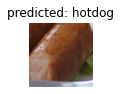

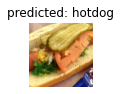

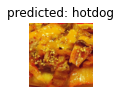

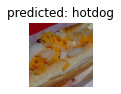

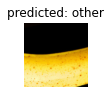

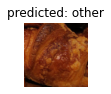

In [20]:
visualize_model(model_ft)

## Zadanie dla chętnych (3 punkty)

W zadaniach dotyczących klasyfikacji obrazu wykorzystywaliśmy prosty zbiór danych i sieć LeNet. Teraz zamień zbiór danych na bardziej skomplikowany, np. [ten](http://www.vision.caltech.edu/datasets/cub_200_2011/) lub [ten](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) (lub inny o podobnym poziomie trudności) i zamiast prostej sieci LeNet użyj bardziej złożonej, np. AlexNet, ResNet, MobileNetV2.
